__Goal__ 

Test:
- MC e-soft normal reward
- MC e-soft custom reward
- SARSA 
- 6-step SARSA
- exp-SARSA
- Q-Learning

10,000 episodes, average of 10 trials

In [1]:
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
from tqdm import trange
from td_methods import *
import gymnasium as gym
from plots import *

In [2]:
epsilon = 0.04
num_episodes = 16_000
gamma = 0.95
num_to_avg = 10
step_size = 0.5
env = gym.make('CartPole-v1')
seed = 123

In [3]:
# Monte Carlo Default Reward
mc_e_soft_ep_lengths_default = []

np.random.seed(seed)
env.reset(seed=seed)
for i in range(num_to_avg):
    Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma)
    mc_e_soft_ep_lengths_default.append(ep_lengths)
    save_array(ep_lengths, f'comparison/mc_default_ep_lengths_16000_{i}.txt')

# 10,000 episodes - 10 runs - epsilon = 0.04 - gamma = 0.95 - step_size = 0.5
# for i in range(num_to_avg):
#     array = load_array(f'comparison/mc_default_ep_lengths_{i}.txt')
#     mc_e_soft_ep_lengths_default.append(array)


In [4]:
# Monte Carlo Custom Reward
mc_e_soft_ep_lengths_custom = []

np.random.seed(seed)
env.reset(seed=seed)
for i in range(num_to_avg):
    Q, policy, _, ep_lengths = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma, episode_generator_func=generate_episode_reward_central_vertical)
    mc_e_soft_ep_lengths_custom.append(ep_lengths)
    save_array(ep_lengths, f'comparison/mc_custom_ep_lengths_16000_{i}.txt')

# for i in range(num_to_avg):
#     array = load_array(f'comparison/mc_custom_ep_lengths_{i}.txt')
#     mc_e_soft_ep_lengths_custom.append(array)

In [5]:
# # SARSA
sarsa_ep_lengths = []

# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q, policy, ep_lengths = sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
#     sarsa_ep_lengths.append(ep_lengths)
#     save_array(ep_lengths, f'comparison/sarsa_ep_lengths_{i}.txt')

for i in range(num_to_avg):
    array = load_array(f'comparison/sarsa_ep_lengths_{i}.txt')
    sarsa_ep_lengths.append(array)

In [6]:
# # 20-step SARSA
n_step_sarsa_ep_lengths = []

# even n-step with n=1000 isnt exactly MC because the step size parameter is different than 1/N for MC

np.random.seed(seed)
env.reset(seed=seed)
for i in range(num_to_avg):
    Q, policy, ep_lengths = nstep_sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma, n=20)
    n_step_sarsa_ep_lengths.append(ep_lengths)
    save_array(ep_lengths, f'comparison/twenty_step_sarsa_ep_lengths_16000{i}.txt')

# for i in range(num_to_avg):
#     array = load_array(f'comparison/n_step_sarsa_ep_lengths_{i}.txt')
#     n_step_sarsa_ep_lengths.append(array)

100%|██████████| 16000/16000 [01:01<00:00, 260.88it/s]


In [7]:
# num_to_avg = 1
# num_episodes = 2
# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q1, policy1, ep_lengths1 = nstep_sarsa(env=env, epsilon=epsilon, step_size=1, num_eps=num_episodes, gamma=gamma, n=400)

# print('test')
# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
#     Q2, policy2, _, ep_lengths2 = on_policy_mc_control_epsilon_soft(env=env, epsilon=epsilon, num_episodes=num_episodes, gamma=gamma)

# # print(Q1)
# # print(Q2)
# # print(ep_lengths1)
# # print(ep_lengths2)

In [8]:
# # Expected SARSA
exp_sarsa_ep_lengths = []

# np.random.seed(seed)
# env.reset(seed=seed)
# for i in range(num_to_avg):
    # Q, policy, ep_lengths = exp_sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
#     exp_sarsa_ep_lengths.append(ep_lengths)
    # save_array(ep_lengths, f'comparison/exp_sarsa_ep_lengths_{i}.txt')

for i in range(num_to_avg):
    array = load_array(f'comparison/exp_sarsa_ep_lengths_{i}.txt')
    exp_sarsa_ep_lengths.append(array)


In [9]:
# Q-Learning
q_learning_ep_lengths = []

np.random.seed(seed)
env.reset(seed=seed)
for i in range(num_to_avg):
    Q, policy, ep_lengths = q_learning(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
    q_learning_ep_lengths.append(ep_lengths)
    save_array(ep_lengths, f'comparison/q_learning_ep_lengths_16000_{i}.txt')

# for i in range(num_to_avg):
#     array = load_array(f'comparison/q_learning_ep_lengths_{i}.txt')
#     q_learning_ep_lengths.append(array)
    

16001it [01:15, 212.43it/s]                           
16001it [01:07, 237.50it/s]                           
16001it [01:06, 240.97it/s]                           
16001it [00:58, 272.22it/s]                           
16001it [01:01, 259.93it/s]                           
16001it [00:59, 270.97it/s]                           
16001it [01:25, 186.06it/s]                           
16001it [01:29, 179.45it/s]                           
16001it [00:59, 266.74it/s]                           
16001it [01:15, 212.75it/s]                           


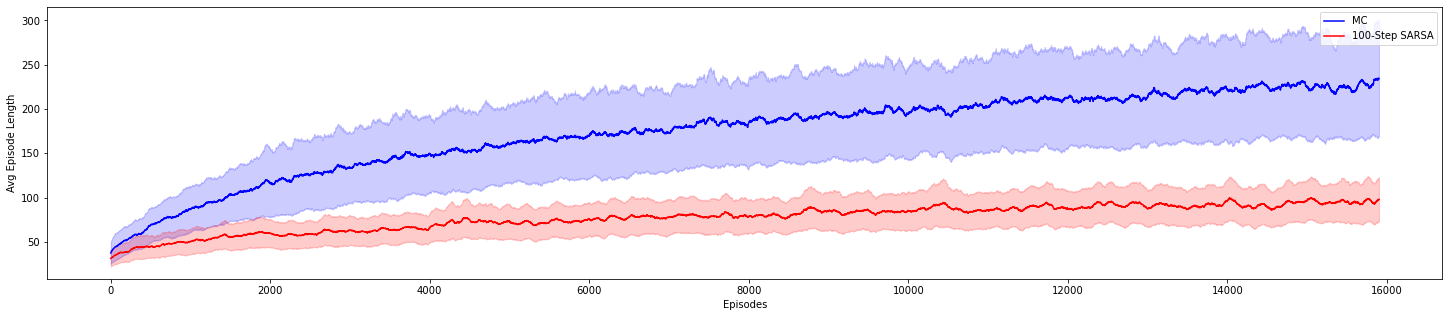

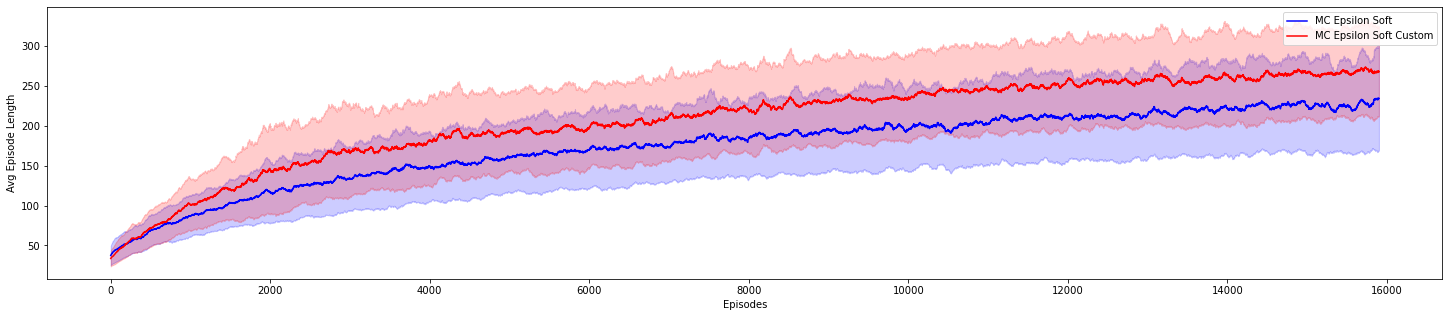

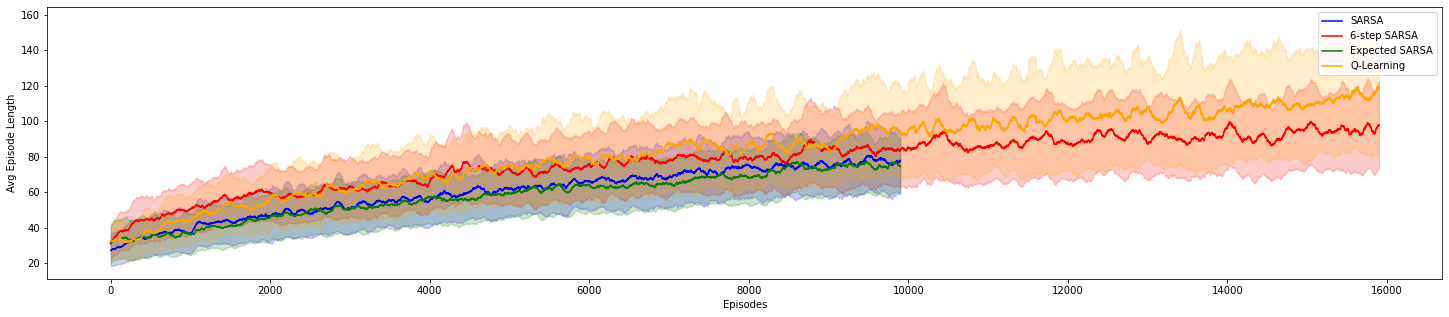

In [10]:
# plot_episode_lengths([mc_e_soft_ep_lengths_default, q_learning_ep_lengths], ['MC Epsilon Soft','Q-Learning'], smoothing=100)
# plot_episode_lengths([sarsa_ep_lengths], ['SASRSA'], smoothing=10)
plot_episode_lengths([mc_e_soft_ep_lengths_default, n_step_sarsa_ep_lengths], ['MC', '100-Step SARSA'], smoothing=100, error_range=True)
plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom], ['MC Epsilon Soft', 'MC Epsilon Soft Custom'], smoothing=100, error_range=True)
plot_episode_lengths([sarsa_ep_lengths, n_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['SARSA', '6-step SARSA', 'Expected SARSA', 'Q-Learning'], smoothing=100, error_range=True)
# plot_episode_lengths([mc_e_soft_ep_lengths_default, mc_e_soft_ep_lengths_custom, sarsa_ep_lengths, n_step_sarsa_ep_lengths, exp_sarsa_ep_lengths, q_learning_ep_lengths], ['MC Epsilon Soft', 'MC Epsilon Soft Custom', 'SARSA', '6-step SARSA', 'Expected SARSA', 'Q-Learning'], smoothing=100, error_range=False)

In [11]:
# run_iterations(env=gym.make('CartPole-v1', render_mode='human'), Q=Q, n=5)